In [3]:
import numpy as np
import matplotlib.pyplot as plt
import cv2
import os

In [4]:
DataDir=r"C:\Users\This PC\Downloads\kagglecatsanddogs_3367a\PetImages/"

In [5]:
CATAEGORIES=["Dog","Cat"]

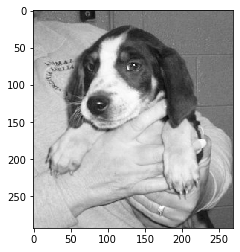

In [6]:
for i in CATAEGORIES:
    path=os.path.join(DataDir,i)
    for img in os.listdir(path):
        img_array=cv2.imread(os.path.join(path,img),cv2.IMREAD_GRAYSCALE)
        plt.imshow(img_array,cmap='gray')
        plt.show()
        break
    break    
    

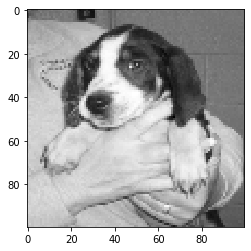

In [9]:
img_size=100
new_array=cv2.resize(img_array,(img_size,img_size))
plt.imshow(new_array,cmap='gray')
plt.show()

In [10]:
training_data=[]

def create_training_data():
    for i in CATAEGORIES:
        path=os.path.join(DataDir,i)
        class_num=CATAEGORIES.index(i)
        
        for img in os.listdir(path):
            try:
                img_array=cv2.imread(os.path.join(path,img),cv2.IMREAD_GRAYSCALE)
                new_array=cv2.resize(img_array,(img_size,img_size))
                training_data.append([new_array,class_num])
            except Exception as e:
                pass

create_training_data()
print(len(training_data))

24898


In [11]:
import random
random.shuffle(training_data)
for sample in training_data[:10]:
    print(sample)

[array([[204, 199, 194, ..., 170, 161, 155],
       [208, 202, 196, ..., 165, 171, 159],
       [209, 200, 195, ..., 182, 171, 169],
       ...,
       [ 93,  93,  97, ..., 140, 132, 131],
       [ 87,  87,  88, ..., 136, 134, 125],
       [ 85,  86,  88, ..., 129, 121, 118]], dtype=uint8), 0]
[array([[ 38,  44,  29, ..., 240, 239, 239],
       [ 50,  40,  25, ..., 240, 240, 239],
       [ 61,  36,  21, ..., 241, 240, 240],
       ...,
       [224, 222, 224, ..., 227, 224, 224],
       [226, 222, 222, ..., 228, 223, 223],
       [225, 222, 221, ..., 228, 223, 223]], dtype=uint8), 1]
[array([[251, 251, 252, ..., 255, 255, 255],
       [253, 252, 252, ..., 255, 255, 255],
       [253, 253, 253, ..., 255, 255, 255],
       ...,
       [159, 116, 156, ..., 147, 190, 188],
       [130, 172, 177, ..., 150, 193, 181],
       [146, 110, 140, ..., 148, 195, 176]], dtype=uint8), 1]
[array([[150, 139, 111, ..., 200, 202, 210],
       [138, 136, 107, ..., 203, 206, 212],
       [139, 139, 135, ...

In [15]:
x=[]
y=[]

for features,label in training_data:
    x.append(features)
    y.append(label)
    
print(np.array(x).reshape(-1,img_size,img_size,1))

x=np.array(x).reshape(-1,img_size,img_size,1)

[[[[204]
   [199]
   [194]
   ...
   [170]
   [161]
   [155]]

  [[208]
   [202]
   [196]
   ...
   [165]
   [171]
   [159]]

  [[209]
   [200]
   [195]
   ...
   [182]
   [171]
   [169]]

  ...

  [[ 93]
   [ 93]
   [ 97]
   ...
   [140]
   [132]
   [131]]

  [[ 87]
   [ 87]
   [ 88]
   ...
   [136]
   [134]
   [125]]

  [[ 85]
   [ 86]
   [ 88]
   ...
   [129]
   [121]
   [118]]]


 [[[ 38]
   [ 44]
   [ 29]
   ...
   [240]
   [239]
   [239]]

  [[ 50]
   [ 40]
   [ 25]
   ...
   [240]
   [240]
   [239]]

  [[ 61]
   [ 36]
   [ 21]
   ...
   [241]
   [240]
   [240]]

  ...

  [[224]
   [222]
   [224]
   ...
   [227]
   [224]
   [224]]

  [[226]
   [222]
   [222]
   ...
   [228]
   [223]
   [223]]

  [[225]
   [222]
   [221]
   ...
   [228]
   [223]
   [223]]]


 [[[251]
   [251]
   [252]
   ...
   [255]
   [255]
   [255]]

  [[253]
   [252]
   [252]
   ...
   [255]
   [255]
   [255]]

  [[253]
   [253]
   [253]
   ...
   [255]
   [255]
   [255]]

  ...

  [[159]
   [116]
   [156]
   

In [44]:
import pickle
pickle_out=open("C:/Users/This PC/Downloads/kagglecatsanddogs_3367a/x.pickle","wb")
pickle.dump(x,pickle_out)
pickle_out.close()

pickle_out=open("C:/Users/This PC/Downloads/kagglecatsanddogs_3367a/y.pickle","wb")
pickle.dump(y,pickle_out)
pickle_out.close()